# Linear least squares regression

Let's look at the *simpler* case first; in particular where $y$ is the sum of basis functions weighted by $a$ (e.g.: polynomial interpolation, radial basis functions... can you think of another one?).

In this case, $y=Ax$, and the data is inserted into $b$.
>CAUTION! We have swapped notation to follow suit with standard practice! The matrix A is the function of the 'position', $x$, and the parameters are in the vector!

Given a matrix system,
$$ A x = b$$
where $A$ is an $m\times n$ matrix, $x$ is $n$, and $b$ is $$. We cannot solve this for an exact $x$ with our normal techniques since $A$ is rectangular, not square.

Recalling the residual is $Ax-b$, let's broaden our concept to a 'solution' to say we want to minimize the (norm of the) residual.


$$Min_x \ of \ \| Ax-b\|=\frac{1}{2} [Ax-b]^T [Ax-b]$$

Setting $\frac{d}{dx} = 0$, we get:

\begin{align}
2 A^T [Ax-b] &= 0 \\
A^T A x &= A^T b \\
 x &= [A^T A]^{-1} A^T b \\
x &= A^† b
\end{align}

where $A^†=[A^T A]^{-1} A^T$ is called the *(Moore-Penrose) pseudoinverse* of $A$. The pseudoinverse is defined for any rectangular matrix. Note $A^T A$ is necessarily square, and is generally invertible.

* The pseudoinverse is defined for any rectangular matrix
* When used to solve $Ax=b$ it results in the *best fit* (in the least squares sense)
* Since the ultimate *minimum* is $0$, the pseudoinverse is the true inverse for an exactly solvable system.





## Conditioning of a rectangular matrix

The determinant of a rectangual matrix is undefined, but we can resort to the definition of the condition number:
$$cond(A) = \|A\| \|A^\dagger\|$$

Terminology
* A **consistent** system of equations has a solution that satisfies *all* the equations.
* An **inconsistent** system has no solution that satisfies all equations simultaneously.

* * **Overdetermined** systems have more equations that unknowns which is typical of curve fitting. These systems are inconsistent in that there is *no simultaneous solution*, but a solution does exists that *simultaneously minimizes the error*.  
* * **Underdetermined** systems have fewer equations than unknowns and are also inconsistent but with an *infinite* number of solutions. E.g.: Parallel lines / 2 equations with 3 variables.

#### Example: An overdetermined, consistent linear system (our headscratcher from the early lectures!)

$20 c + 50 t = 700$

$  c+t = 20$

$ 50 c + 20 t = 700$

which gives the linear system:

$$\begin{bmatrix}
 20 & 50  \\
 1 & 1 \\
 50 & 20
 \end{bmatrix}
 \begin{bmatrix}
 c \\
 t
 \end{bmatrix} =
 \begin{bmatrix}
 700 \\
 20 \\
 700
 \end{bmatrix}
 $$

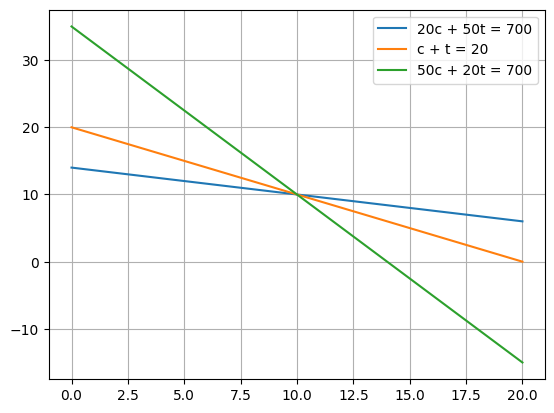

In [1]:
#Plot it!

import matplotlib.pyplot as plt
import numpy as np

# Define the x values
x = np.linspace(0, 20, 100)

# Calculate the y values for the first equation (20c + 50t = 700)
y1 = (700 - 20 * x) / 50

# Calculate the y values for the second equation (c + t = 20)
y2 = 20 - x

# Calculate the y values for the third equation (50c + 20t = 700)
y3 = (700 - 50 * x) / 20

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='50c + 20t = 700')

# Add a grid
plt.grid(True)
plt.legend()
plt.show()



In [5]:
#The arrays are:
# ~~ Question - what is the linear system and how do we solve it?

A = np.array([[20, 50], [1, 1], [50, 20]])
b = np.array([700, 20, 700])

#x = np.linalg.solve(A, b)

M = np.linalg.inv(A.T @ A)@A.T
print(np.linalg.pinv(A))
print(M-np.linalg.pinv(A))
print(M@b)





# ~~ Answer
# A = np.array([[20, 50], [1, 1], [50, 20]])
# b = np.array([700, 20, 700])

# #x = np.linalg.solve(A, b)

# M = np.linalg.inv(A.T @ A)@A.T
# print(M)
# print(np.linalg.pinv(A))
# print(M-np.linalg.pinv(A))
# print(M@b)


[[-0.00952672  0.000204    0.02380661]
 [ 0.02380661  0.000204   -0.00952672]]
[[-1.73472348e-18  2.71050543e-19  6.93889390e-18]
 [ 1.04083409e-17 -3.25260652e-19 -1.73472348e-18]]
[10. 10.]


#### Example: An overdetermined, inconsistent linear system


$20 c + 50 t = 700$

$  c+t = 20$

$ 60 c + 20 t = 700$

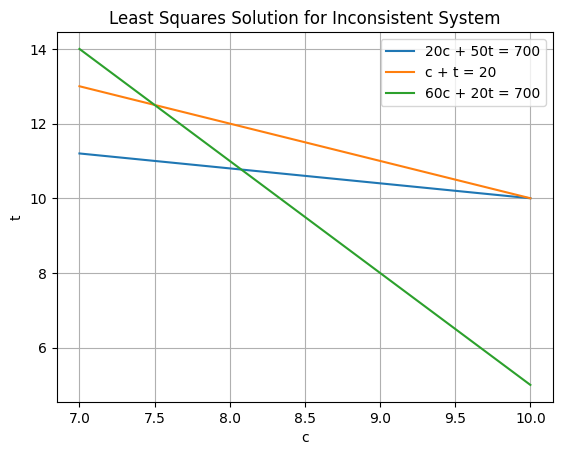

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Define the x values
x = np.linspace(7, 10, 100)

# Calculate the y values for the first equation (20c + 50t = 700)
y1 = (700 - 20 * x) / 50

# Calculate the y values for the second equation (c + t = 20)
y2 = 20 - x

# Calculate the y values for the third equation (60c + 20t = 700)
y3 = (700 - 60 * x) / 20

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='60c + 20t = 700')

plt.xlabel('c')
plt.ylabel('t')
plt.title('Least Squares Solution for Inconsistent System')
plt.legend()
plt.grid(True)
plt.show()

Where do you think he solution is going to be?

[ 8.07704251 10.76953789]
[ 8.07704251 10.76953789]


<ipython-input-7-52bb65e377be>:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_lsq,_,_,_ = np.linalg.lstsq(A,b)


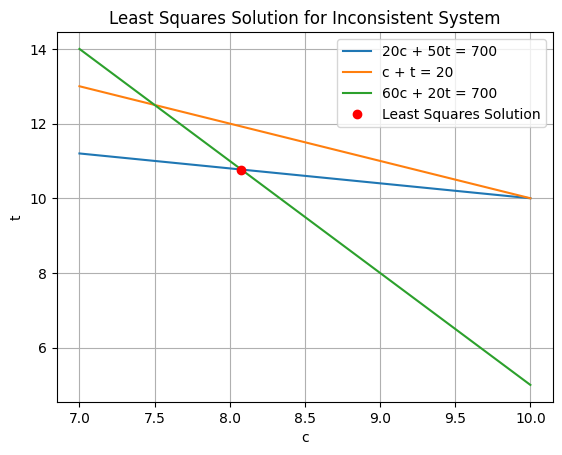

In [7]:
A = np.array([[20, 50], [1, 1], [60, 20]])
b = np.array([700, 20, 700])

#np.linalg.(A, b)
x_lsq = np.linalg.pinv(A)@b
print(x_lsq)
x_lsq,_,_,_ = np.linalg.lstsq(A,b)
print(x_lsq)

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='60c + 20t = 700')


plt.plot(x_lsq[0], x_lsq[1], 'ro', label='Least Squares Solution')
plt.xlabel('c')
plt.ylabel('t')
plt.title('Least Squares Solution for Inconsistent System')
plt.legend()
plt.grid(True)
plt.show()

Was this what you were expecting?

## Weights

As with most approximate methods, the moment we start to move away from an *exact solution* subtle effects start to show up!

Notice we are minimizing the *residuals* but there is a subtle problem with the problem definition above:

$$\begin{align}
20 c + 50 t &= 700  \\
c+t  &= 20 \\
60 c + 20 t &= 700
\end{align} $$

The coefficients of the second equation is about an order of magnitude lower than the others. Of course this system is equivilant to:

$$\begin{align}
20 c + 50 t &= 700  \\
10c+10t  &= 200 \\
60 c + 20 t &= 700
\end{align} $$

or even

$$\begin{align}
0.2 c + 0.5 t &= 7  \\
c+t  &= 20 \\
0.6 c + 0.2 t &= 7
\end{align} $$

What does this remind you of?


Jacobi (diagonal) preconditioning!

$$P^{-1} = \begin{bmatrix} W_{1} & 0 & 0 \\ 0 & W_{2} & 0 \\ 0 & 0 & W_{3} \end{bmatrix}
$$



If we define $r_1, r_2, r_3$:

$$\begin{align}
20 c + 50 t -700 &= r_1 \\
c+t -20 &= r_2 \\
60 c + 20 t -700 &= r_3
\end{align} $$

We say the residuals are / can be *weighted*, i.e.: the least squares problem becomes,

$$ Min_x \ of \ \sum W_i^2 r_i $$

Let's code it!




[[1 0 0]
 [0 7 0]
 [0 0 1]]
[ 8.08267345 10.78401744]


<ipython-input-13-2aa1c6412f60>:20: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_lsq,_,_,_ = np.linalg.lstsq(A,b)


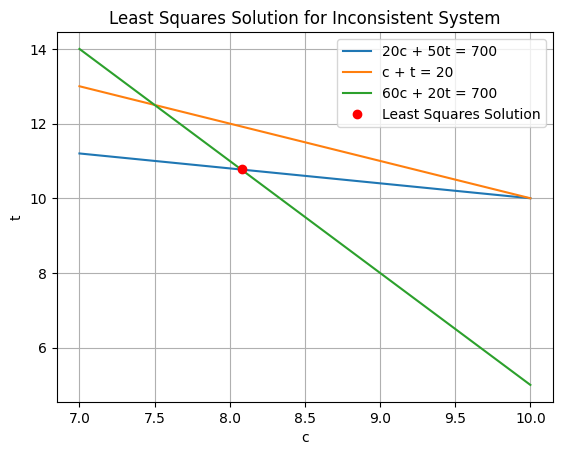

In [13]:
A = np.array([[20, 50], [1, 1], [60, 20]])
b = np.array([700, 20, 700])

#~~ Question: What's the preconditioner? How do we apply it?
Pi = np.diag([1,7,1])
print(Pi)
A = Pi@A
b = Pi@b
###

#~~ Answer
# Pi = np.diag([1,70,1])
# print(Pi)
# A = Pi@A
# b = Pi@b
###



x_lsq,_,_,_ = np.linalg.lstsq(A,b)

print(x_lsq)

# Plot the lines
plt.plot(x, y1, label='20c + 50t = 700')
plt.plot(x, y2, label='c + t = 20')
plt.plot(x, y3, label='60c + 20t = 700')


plt.plot(x_lsq[0], x_lsq[1], 'ro', label='Least Squares Solution')
plt.xlabel('c')
plt.ylabel('t')
plt.title('Least Squares Solution for Inconsistent System')
plt.legend()
plt.grid(True)
plt.show()

Weights are an excellent way to introduce measurement uncertainty into your fit!

